In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train=pd.read_csv('C:/Users/rs551/OneDrive - The University Of Newcastle/OneDrive - The University of Newcastle/ML in education/turkiye-student-evaluation_generic.csv')

In [3]:
train.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [5]:
train.isnull().sum() # checking missing values

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [6]:
train.describe() # statistical infos of the columns

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
train.corr() # the correlation between the columns

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
instr,1.000000,-0.039871,0.112763,-0.107231,-0.058368,-0.128931,-0.127070,-0.108949,-0.113222,-0.135606,...,-0.112485,-0.086831,-0.078101,-0.080586,-0.118889,-0.128880,-0.083563,-0.103499,-0.107664,-0.081672
class,-0.039871,1.000000,0.091527,-0.016312,-0.044899,-0.029542,-0.033274,-0.021534,-0.030165,-0.036584,...,-0.018727,-0.031234,-0.022758,-0.016553,-0.025983,-0.036712,-0.027816,-0.029491,-0.022576,-0.037364
nb.repeat,0.112763,0.091527,1.000000,-0.078086,0.110493,-0.024708,-0.041707,-0.035704,-0.033613,-0.031770,...,-0.045568,-0.042624,-0.046262,-0.045464,-0.041233,-0.033618,-0.049918,-0.035518,-0.032457,-0.044900
attendance,-0.107231,-0.016312,-0.078086,1.000000,0.436792,0.105266,0.149258,0.178393,0.138108,0.149747,...,0.190694,0.195166,0.204802,0.207740,0.177814,0.163546,0.204435,0.172695,0.144687,0.200150
difficulty,-0.058368,-0.044899,0.110493,0.436792,1.000000,0.052120,0.065031,0.071457,0.062171,0.064181,...,0.080017,0.091051,0.095628,0.099543,0.075317,0.072609,0.099682,0.064456,0.059370,0.090876
Q1,-0.128931,-0.029542,-0.024708,0.105266,0.052120,1.000000,0.866138,0.767381,0.849773,0.804757,...,0.699370,0.685299,0.673770,0.670702,0.728770,0.732167,0.672120,0.698924,0.709639,0.658873
Q2,-0.127070,-0.033274,-0.041707,0.149258,0.065031,0.866138,1.000000,0.850766,0.873556,0.861803,...,0.788643,0.778299,0.764986,0.766872,0.801172,0.797314,0.766622,0.778405,0.768125,0.752515
Q3,-0.108949,-0.021534,-0.035704,0.178393,0.071457,0.767381,0.850766,1.000000,0.826342,0.843329,...,0.799645,0.795384,0.791391,0.789747,0.799752,0.792241,0.793341,0.796296,0.765633,0.781299
Q4,-0.113222,-0.030165,-0.033613,0.138108,0.062171,0.849773,0.873556,0.826342,1.000000,0.867861,...,0.769526,0.759810,0.752171,0.748081,0.788852,0.789508,0.752370,0.766368,0.759536,0.742186
Q5,-0.135606,-0.036584,-0.031770,0.149747,0.064181,0.804757,0.861803,0.843329,0.867861,1.000000,...,0.809381,0.794833,0.780245,0.778777,0.831221,0.830279,0.782437,0.804916,0.791877,0.767411


# DATA VISULIZATION

<AxesSubplot:xlabel='class', ylabel='count'>

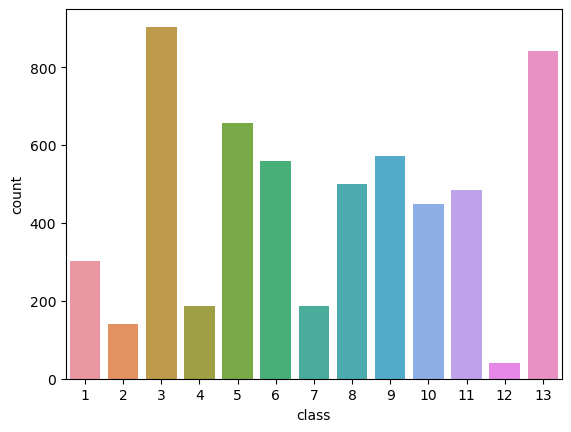

In [8]:
sns.countplot(x="class",data=train)

Number of course taken by Student(course No. 3 is student favourite,Course No. 12 is mostly disliked by them)

<AxesSubplot:xlabel='class', ylabel='count'>

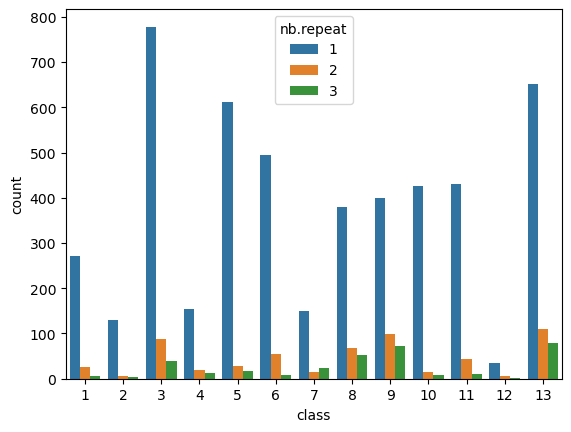

In [9]:
sns.countplot(x="class",hue="nb.repeat",data=train)

Course no. 13 is mostly repeated by students

<AxesSubplot:xlabel='nb.repeat', ylabel='count'>

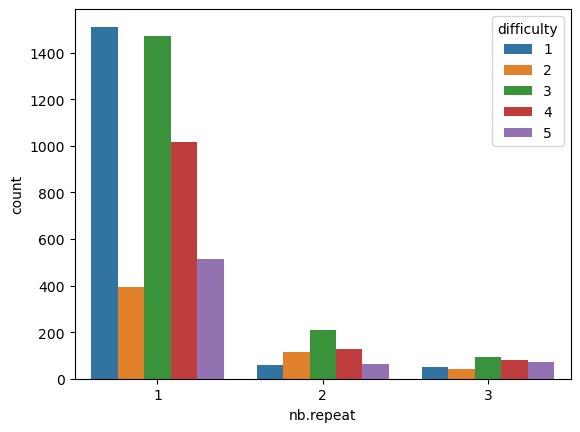

In [10]:
sns.countplot(x="nb.repeat",hue="difficulty",data=train)

Easy courses are also repeated by students

<AxesSubplot:xlabel='difficulty', ylabel='count'>

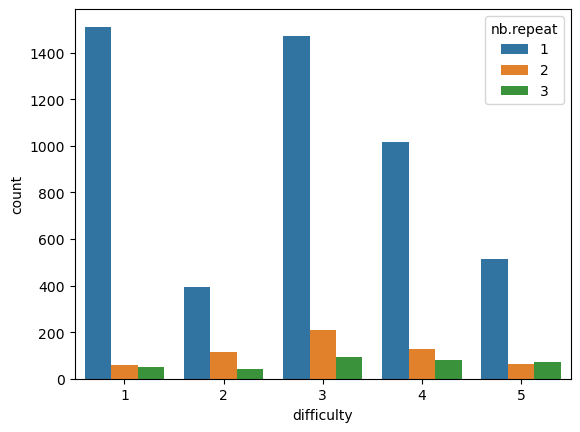

In [11]:
sns.countplot(x="difficulty",hue="nb.repeat",data=train)

<AxesSubplot:xlabel='difficulty', ylabel='count'>

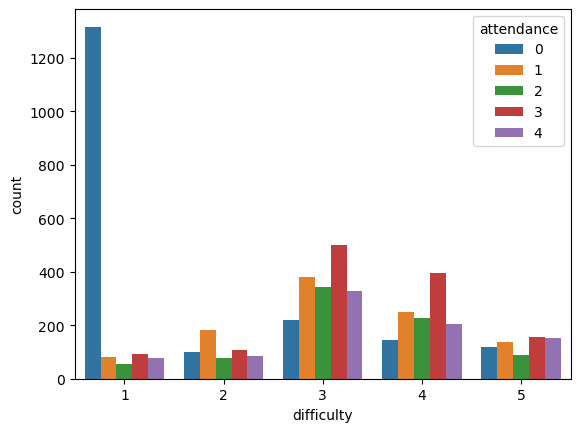

In [12]:
sns.countplot(x="difficulty",hue="attendance",data=train)

<AxesSubplot:xlabel='class', ylabel='count'>

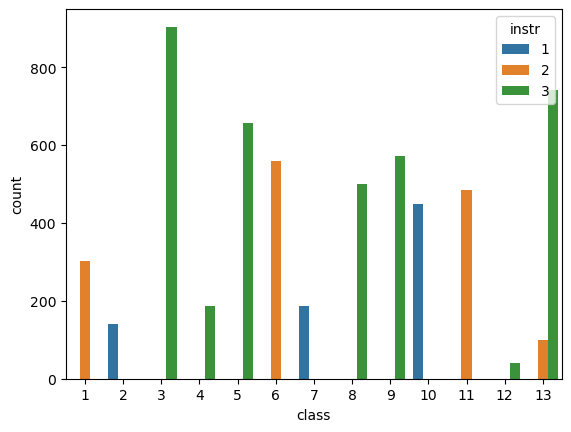

In [13]:
sns.countplot(x="class",hue="instr",data=train)

Instructor1:Course No.-2,7,10 Instructor2:Course No.-1,6,11,13 Instructor3:Course No.-3,4,5,8,9,12,13 Course No. 13 is jointly taken by Intructor1,Instructor2 Instructor1 is least popular May be

<AxesSubplot:xlabel='class', ylabel='count'>

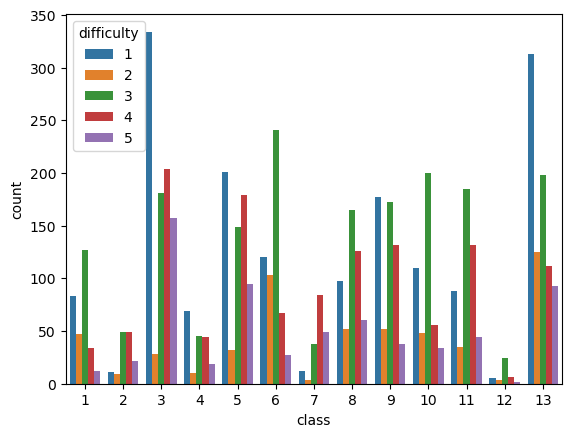

In [14]:
sns.countplot(x="class",hue="difficulty",data=train)

In [15]:
# Calculate mean for each question response for all the classes.
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in range(1,13):
    class_data = train[(train["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    #Class related questions are from Q1 to Q12
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num] 
    print(classlist)
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\3556827845.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\3556827845.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\3556827845.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\3556827845.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

<AxesSubplot:xlabel='questions', ylabel='mean'>

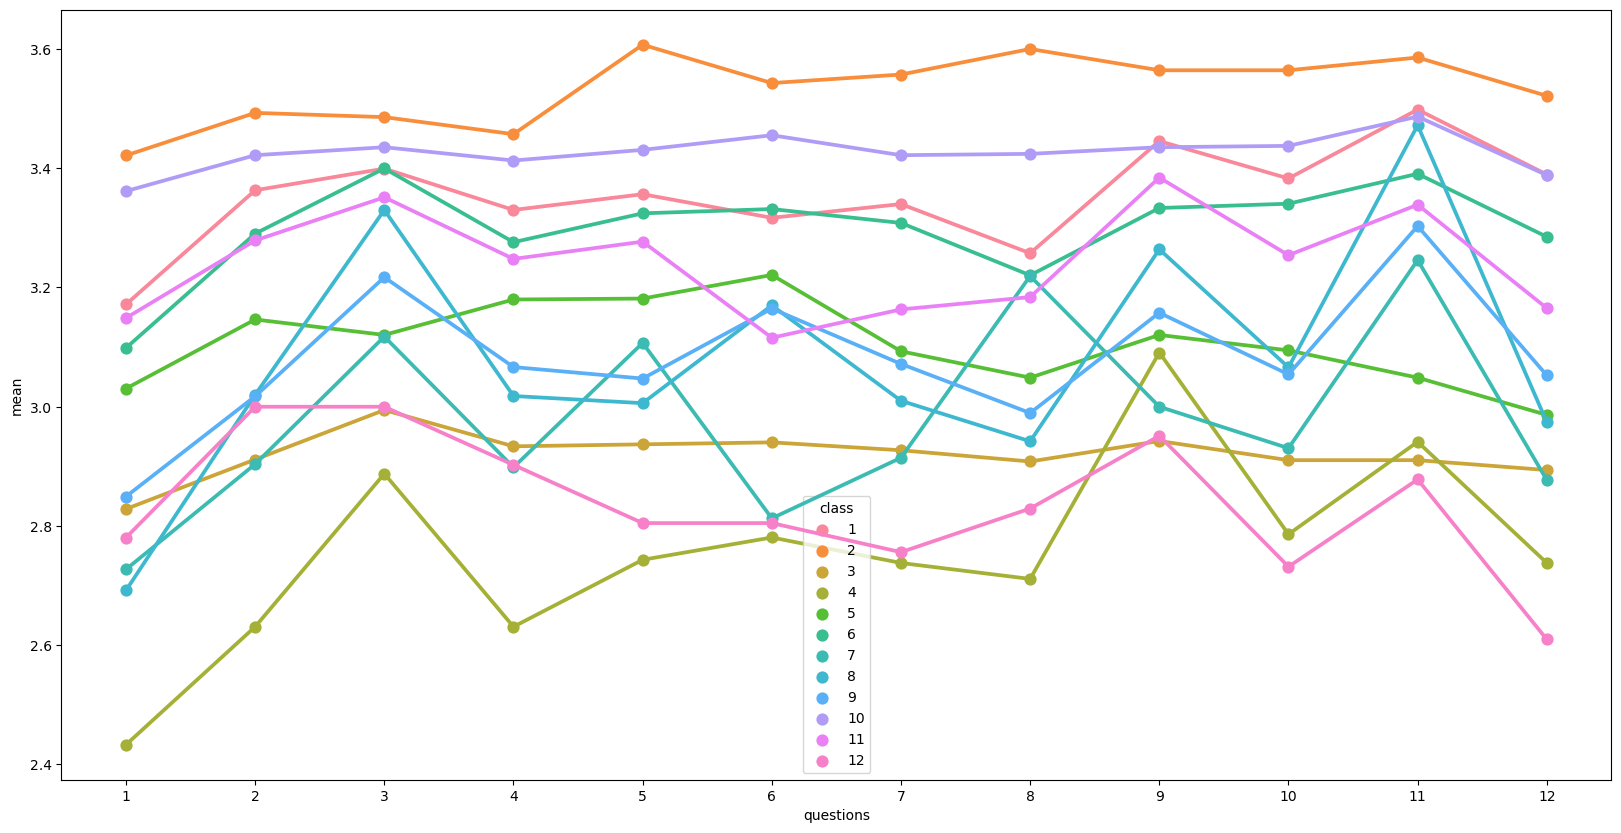

In [16]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

In [17]:
# Calculate mean for each question response for all the classes.
questionmeans = []
inslist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
for ins_num in range(1,4):
    ins_data = train[(train["instr"]==ins_num)]
    questionmeans = []
    inslist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
        
    for col in range(17,33):
        questionmeans.append(ins_data.iloc[:,col].mean())
        inslist += 16 * [ins_num]
        plotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
        totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\2219236536.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\2219236536.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\2219236536.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\2219236536.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

<AxesSubplot:xlabel='questions', ylabel='mean'>

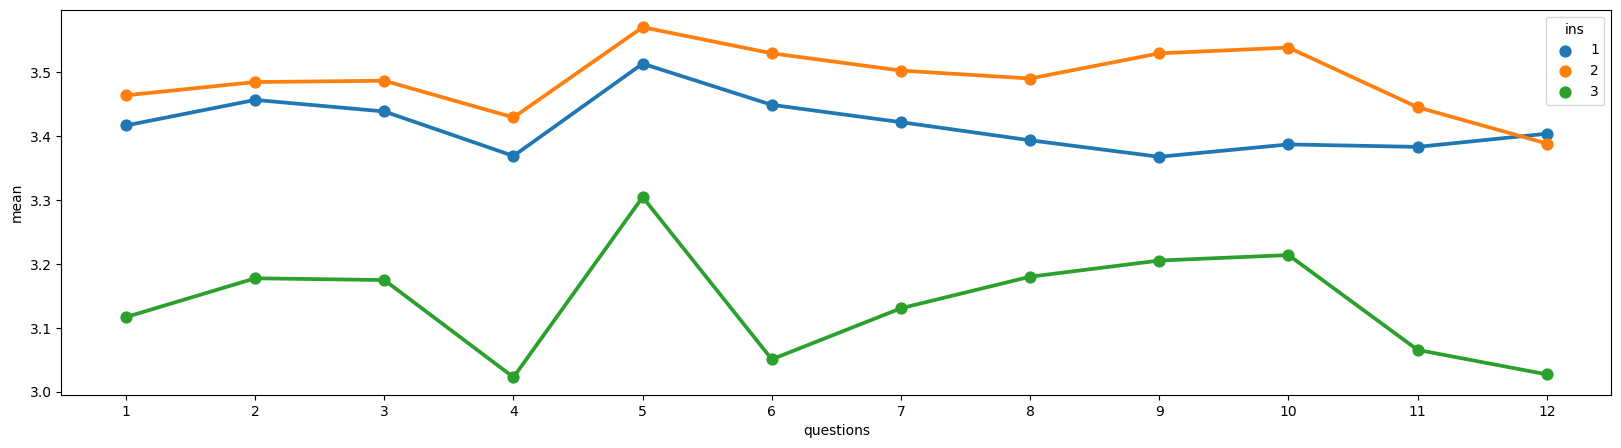

In [18]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="ins")

In [19]:
# Calculate mean for each question response for all the classes.
questionmeans = []
inslist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
for ins_num in range(1,4):
    ins_data = train[(train["instr"]==ins_num)]
    questionmeans = []
    inslist = []
    questions = []
    
    for num in range(13,29):
        questions.append(num)
        
    for col in range(17,33):
        questionmeans.append(ins_data.iloc[:,col].mean())
        inslist += 16 * [ins_num]
        plotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
        totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\1611372408.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\1611372408.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\1611372408.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\1611372408.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

<AxesSubplot:xlabel='questions', ylabel='mean'>

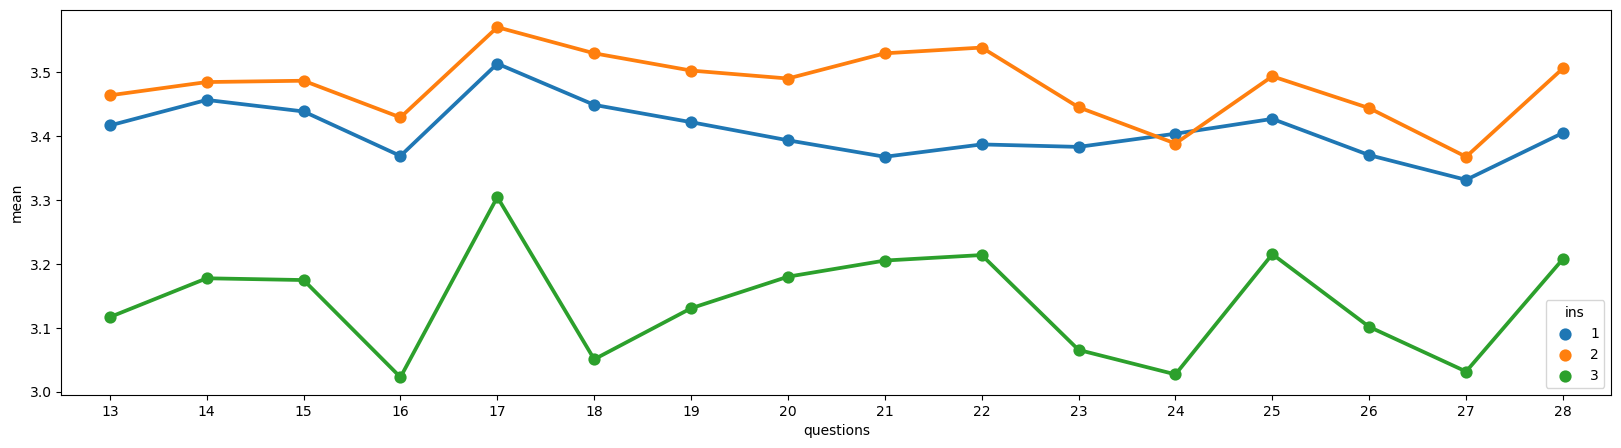

In [20]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="ins")

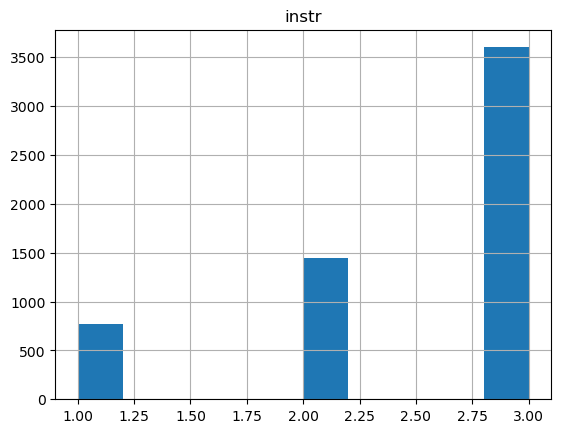

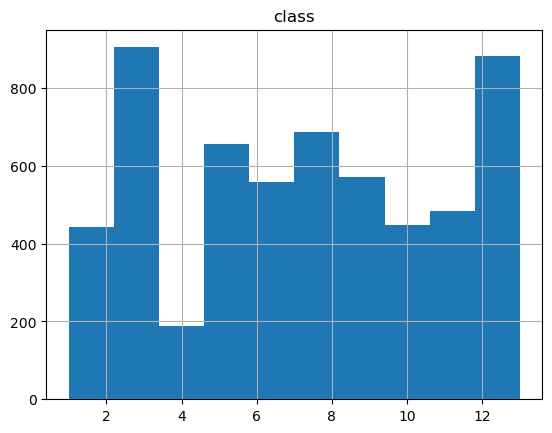

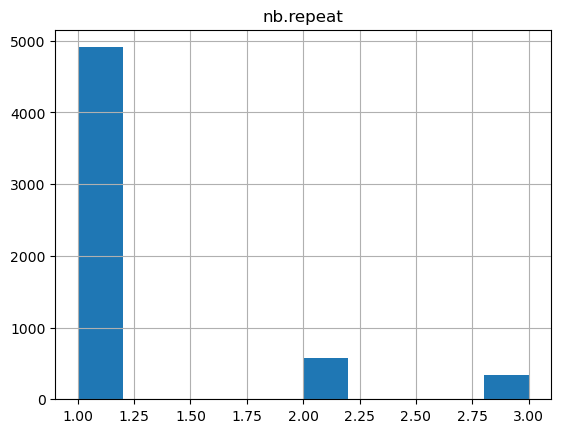

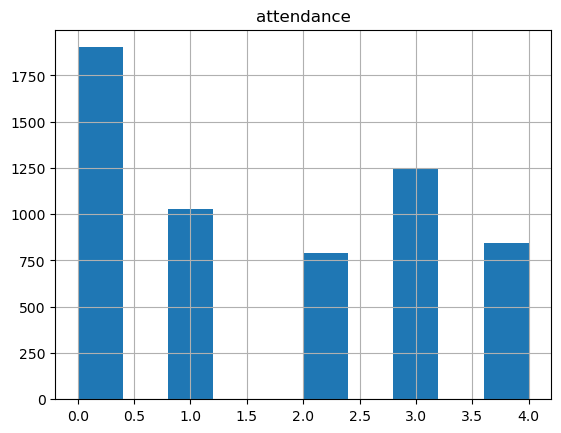

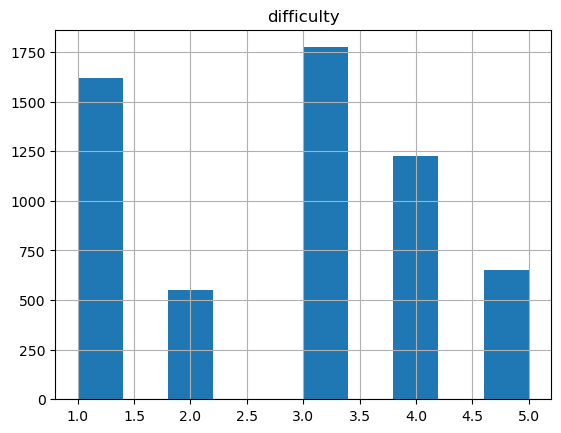

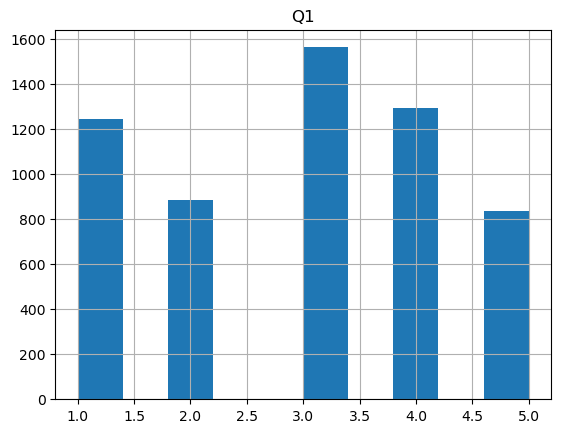

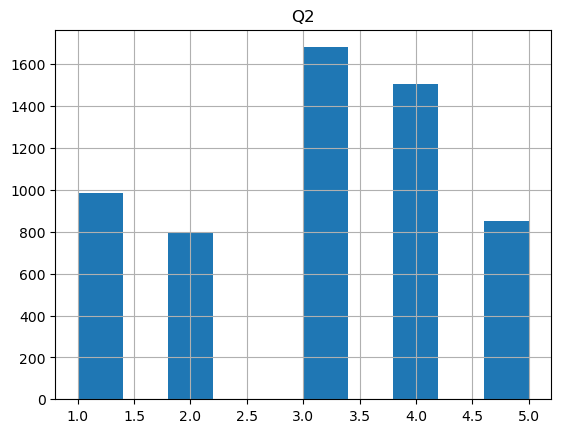

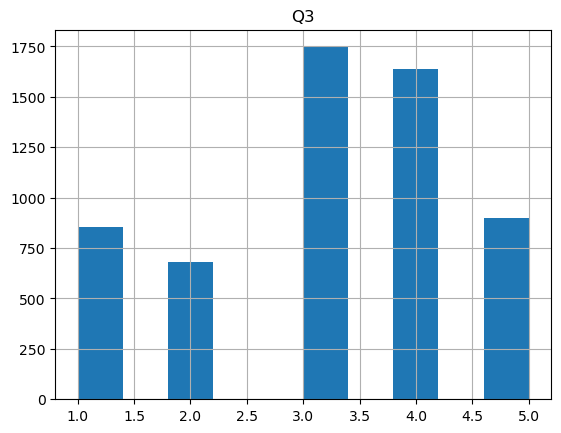

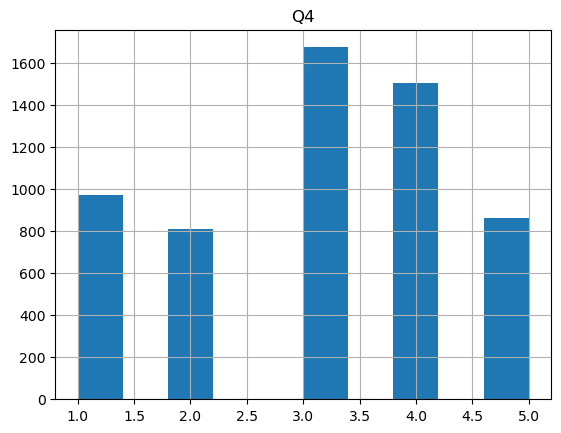

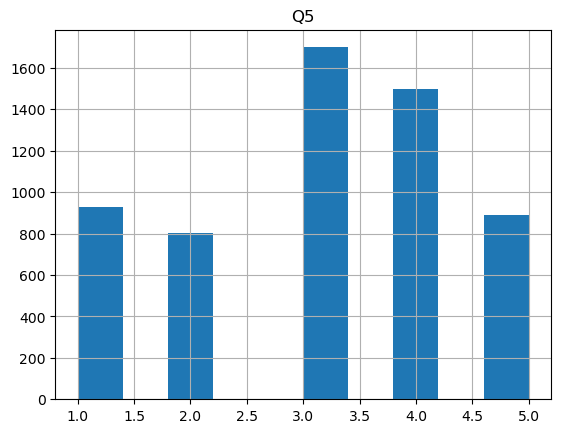

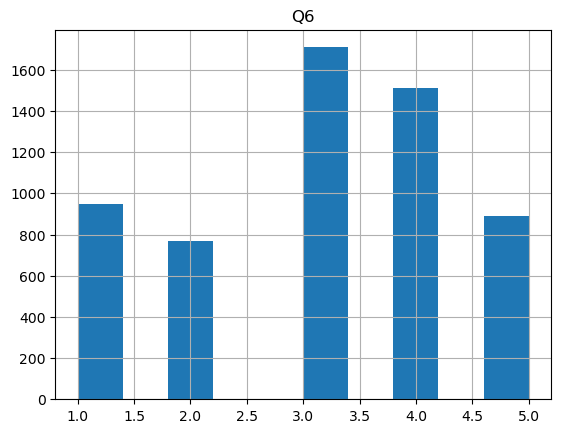

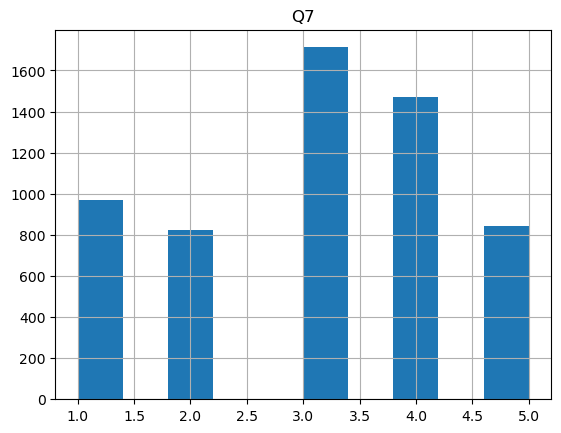

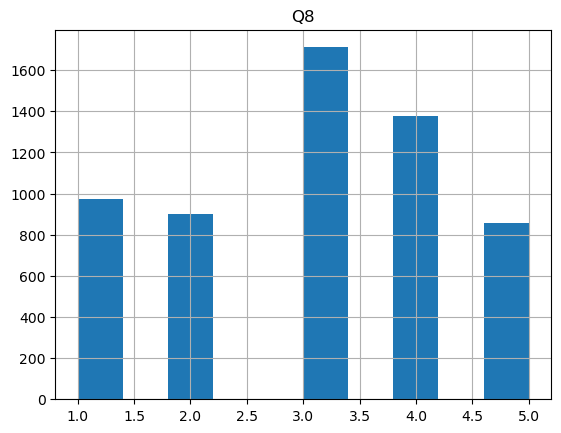

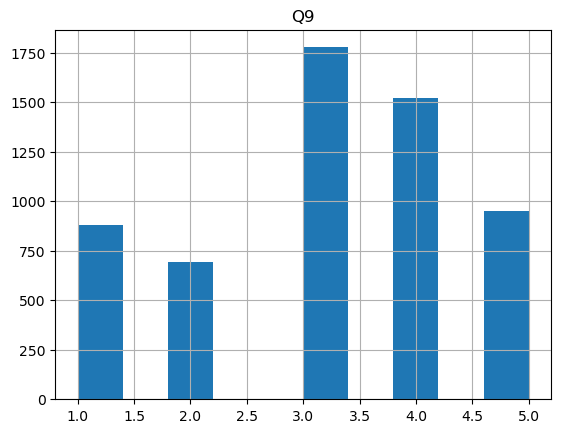

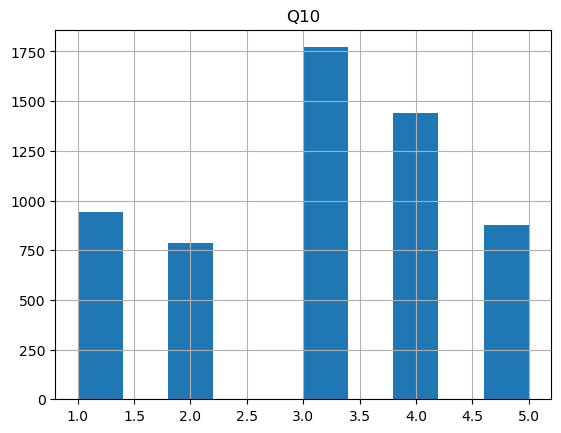

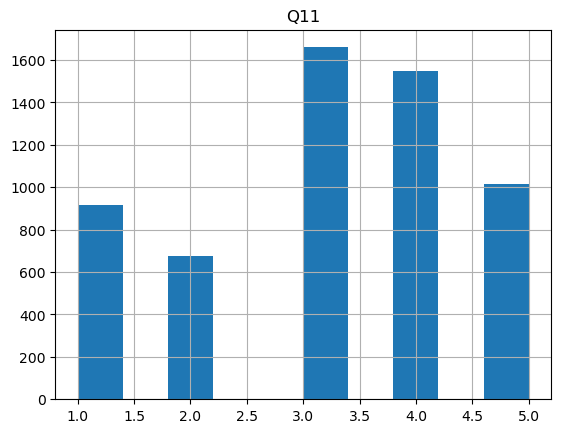

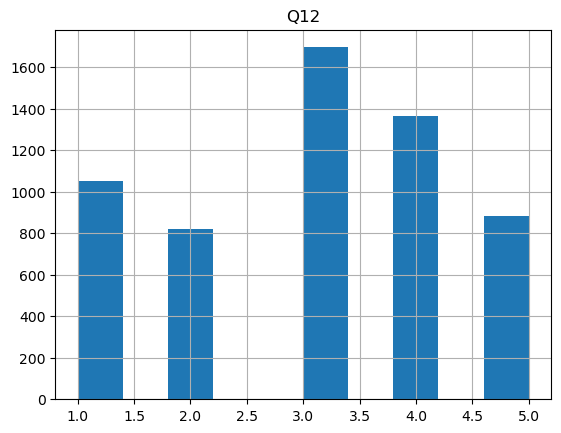

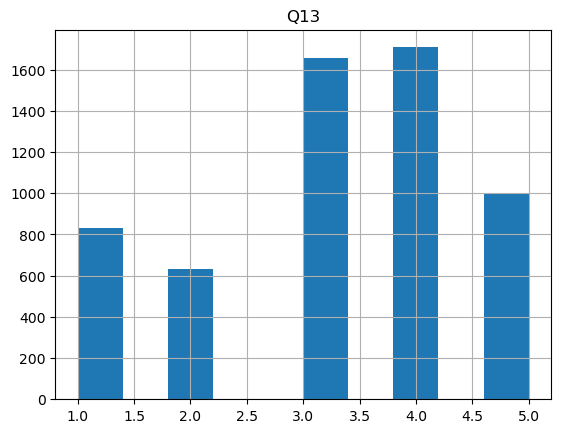

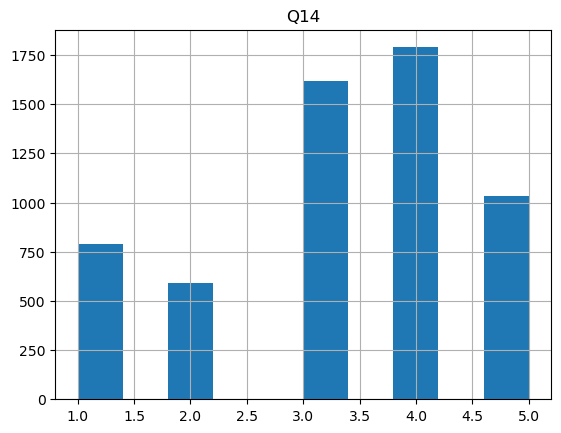

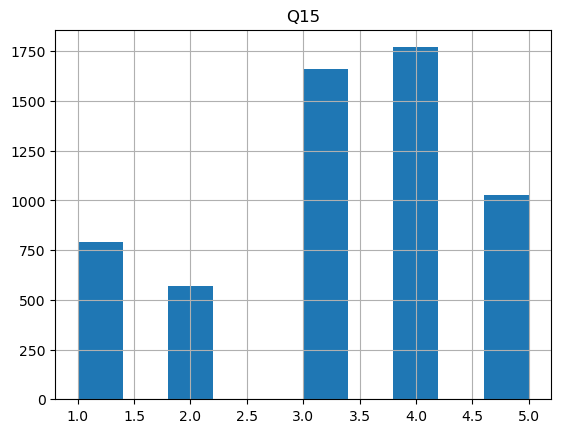

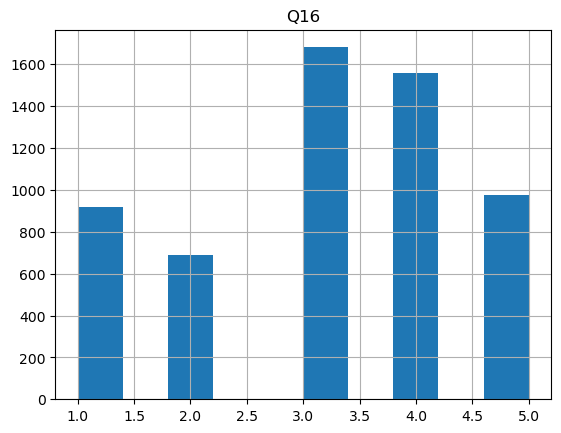

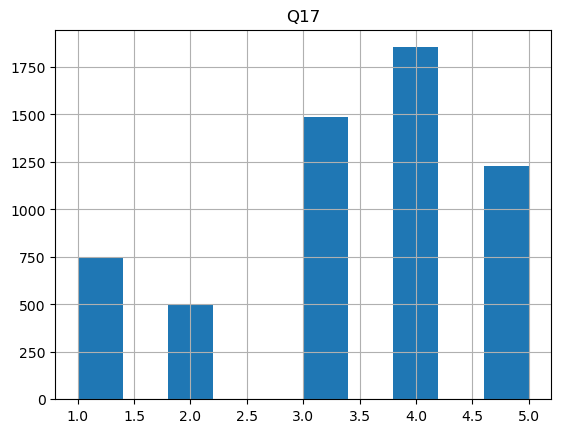

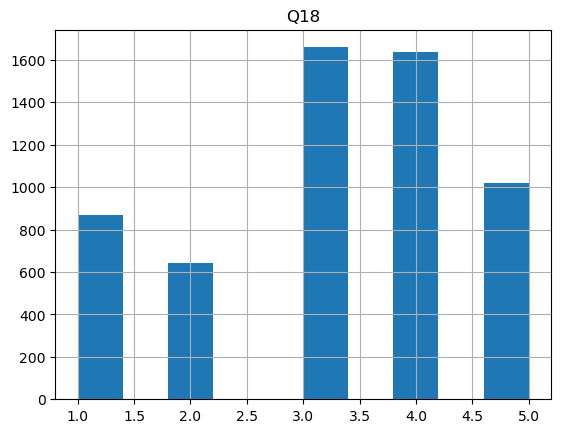

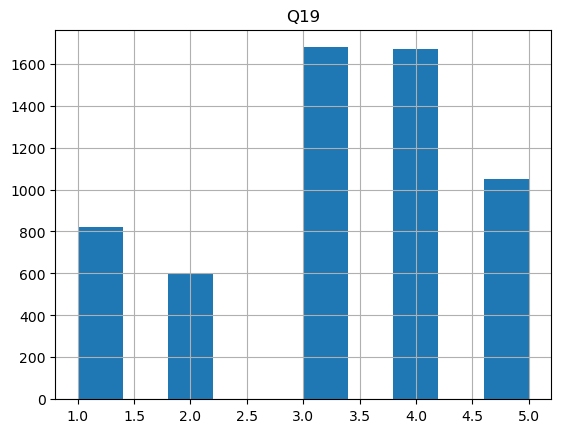

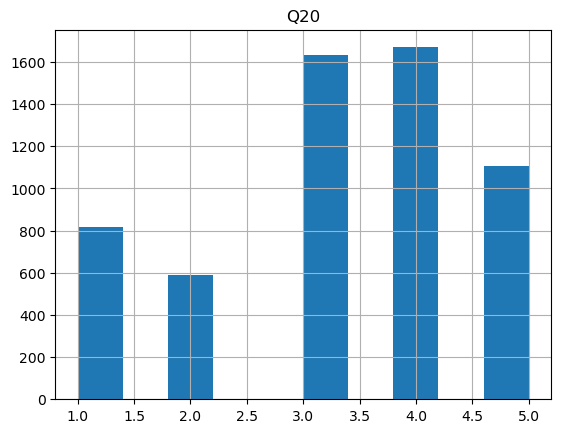

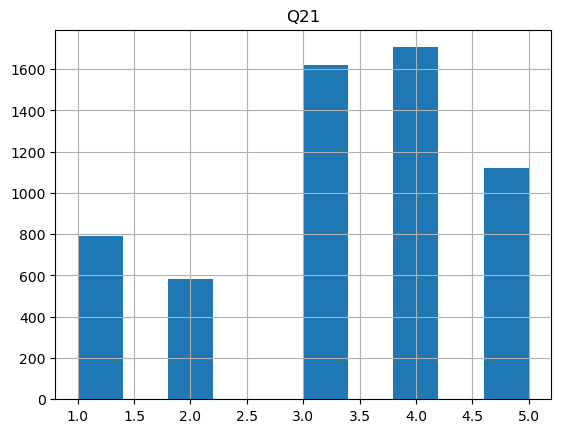

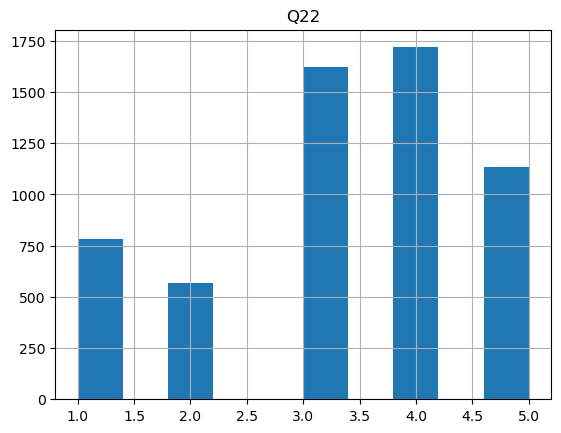

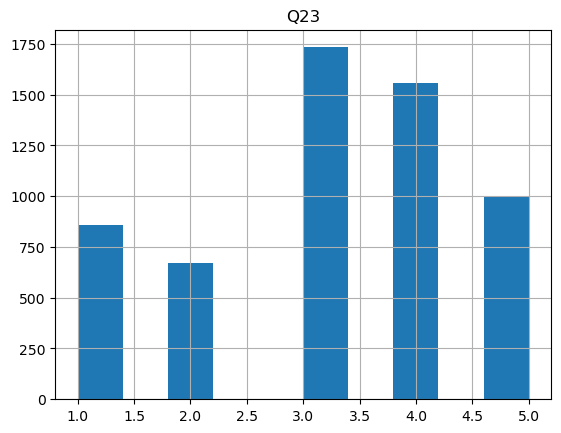

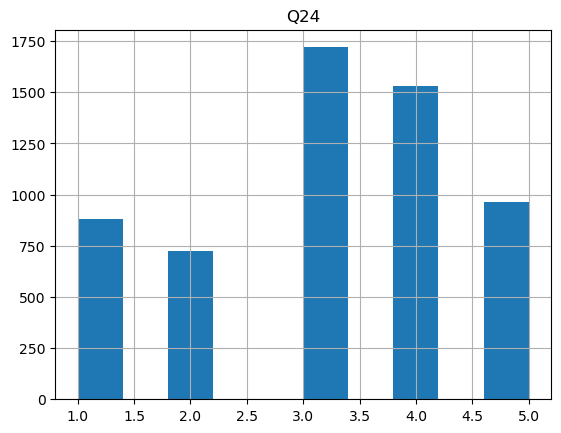

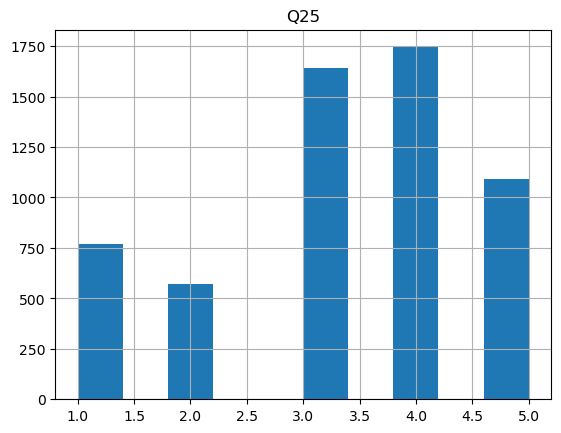

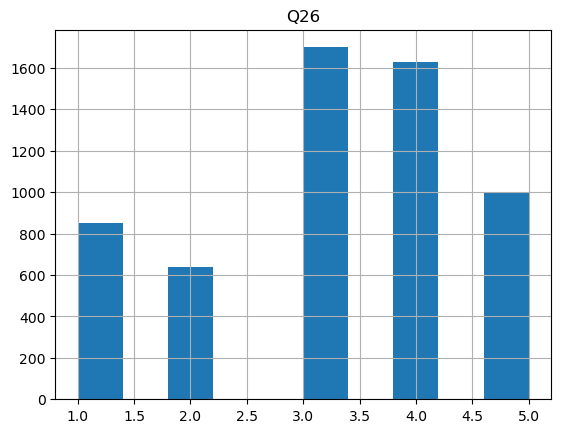

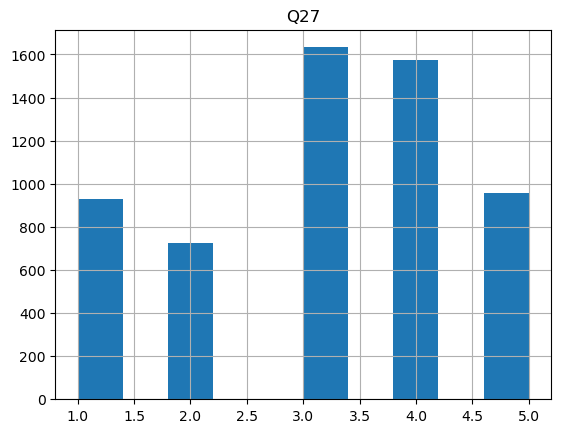

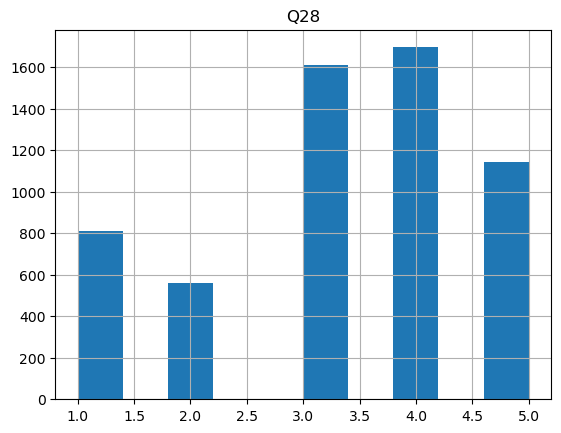

In [21]:
for i in train.columns:
    train.hist(i)
    plt.show()

In [22]:
# Calculate mean for each question response for all the classes for Instructor 3
dataset_inst3 = train[(train["instr"]==3)]
class_array_for_inst3 = dataset_inst3["class"].unique().tolist()
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in class_array_for_inst3:
    class_data = dataset_inst3[(dataset_inst3["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num]
    
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\96306492.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\96306492.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\96306492.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
C:\Users\rs551\AppData\Local\Temp\1\ipykernel_28192\96306492.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

<AxesSubplot:xlabel='questions', ylabel='mean'>

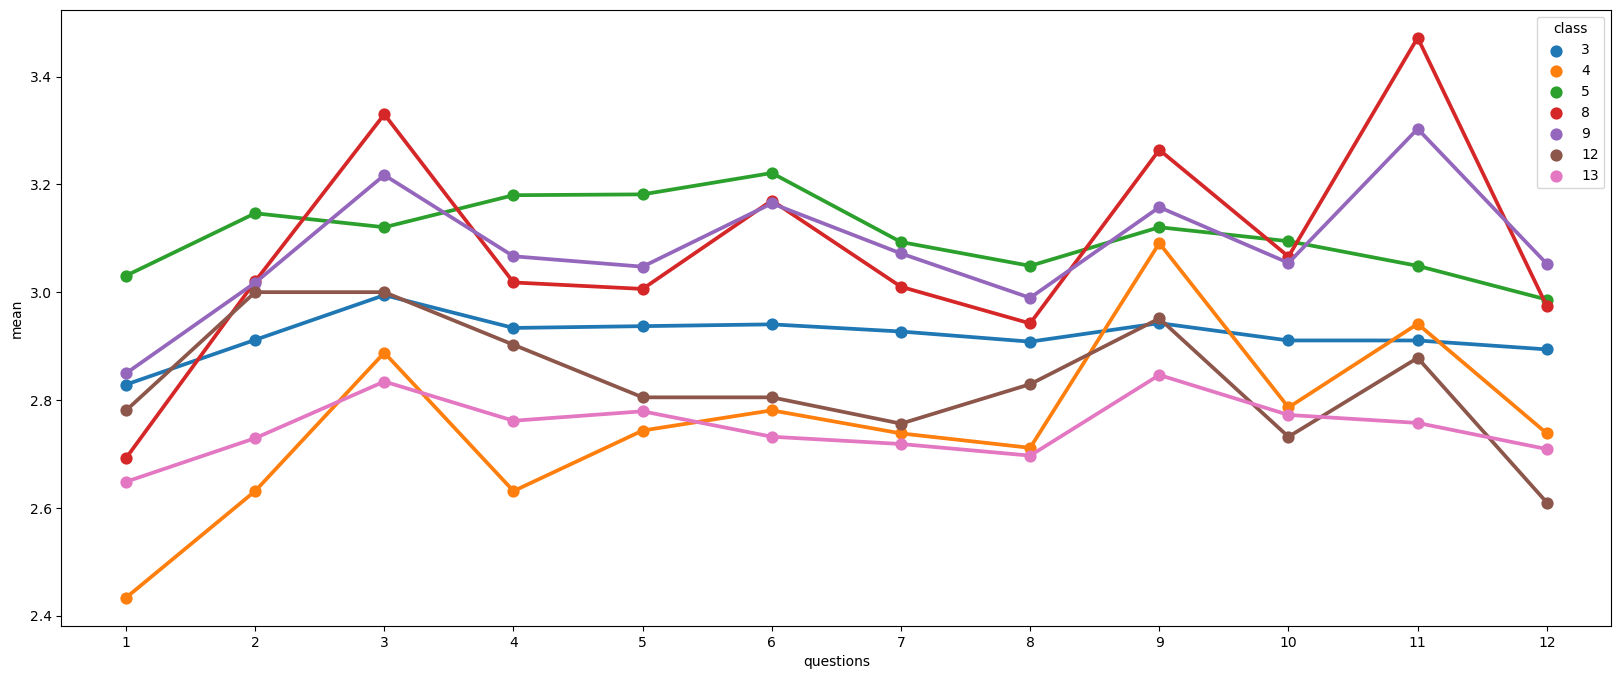

In [23]:
plt.figure(figsize=(20, 8))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

# DATA PREPROCESSING

In [24]:
X_res=train.values

In [25]:
X_res

array([[ 1,  2,  1, ...,  3,  3,  3],
       [ 1,  2,  1, ...,  3,  3,  3],
       [ 1,  2,  1, ...,  5,  5,  5],
       ...,
       [ 3, 13,  1, ...,  5,  5,  5],
       [ 3, 13,  1, ...,  1,  1,  1],
       [ 3, 13,  1, ...,  1,  1,  1]], dtype=int64)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features=scaler.fit_transform(X_res)

In [27]:
features

array([[-2.06785045, -1.43071903, -0.40217401, ..., -0.17485237,
        -0.11984497, -0.24094785],
       [-2.06785045, -1.43071903, -0.40217401, ..., -0.17485237,
        -0.11984497, -0.24094785],
       [-2.06785045, -1.43071903, -0.40217401, ...,  1.39922464,
         1.42842963,  1.32326465],
       ...,
       [ 0.71607035,  1.55204221, -0.40217401, ...,  1.39922464,
         1.42842963,  1.32326465],
       [ 0.71607035,  1.55204221, -0.40217401, ..., -1.74892938,
        -1.66811957, -1.80516036],
       [ 0.71607035,  1.55204221, -0.40217401, ..., -1.74892938,
        -1.66811957, -1.80516036]])

# Lets begin to cluster the students based on the questionaire data

In [28]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(features)

In [29]:
kmeans.labels_

array([1, 1, 3, ..., 3, 0, 0])

In [30]:
kmeans.inertia_

60429.48518647488

Lets find suitable value for k using elbow method and silhoutte score

In [31]:
m=[]
for k in range(1,80):
    km=KMeans(n_clusters=k, random_state=42).fit(features)
    m.append(km.inertia_)


In [32]:
m

[192060.0,
 105150.06655006738,
 73956.57647075762,
 65555.53817831198,
 60429.48518647488,
 57626.854512348065,
 55864.947984242266,
 54405.822206187906,
 52894.24094707264,
 51563.43991430392,
 50564.603799959346,
 49697.2280791215,
 48608.84234065787,
 48008.612356655845,
 47113.75304121592,
 46192.73185525652,
 45616.63187649347,
 44804.826377736244,
 44213.64625485961,
 44368.63290254331,
 43123.40705046253,
 43001.69814417867,
 42318.29785274557,
 41697.930180032134,
 41269.830982345724,
 40892.281624300114,
 40639.96100225892,
 40452.24449550529,
 40132.009975655135,
 39507.63912539059,
 39571.873592939424,
 39224.07525306621,
 38733.58271473888,
 38597.09927927821,
 38380.95714714245,
 38007.267923180065,
 37873.15613909749,
 37654.2406517216,
 37571.24302765307,
 37394.50444181569,
 37129.54292881875,
 37087.48329580923,
 36873.060845295484,
 36453.32179781366,
 36554.25649988977,
 36426.770832030204,
 36171.38580769636,
 35943.29895745435,
 35884.89827963588,
 35618.651561895

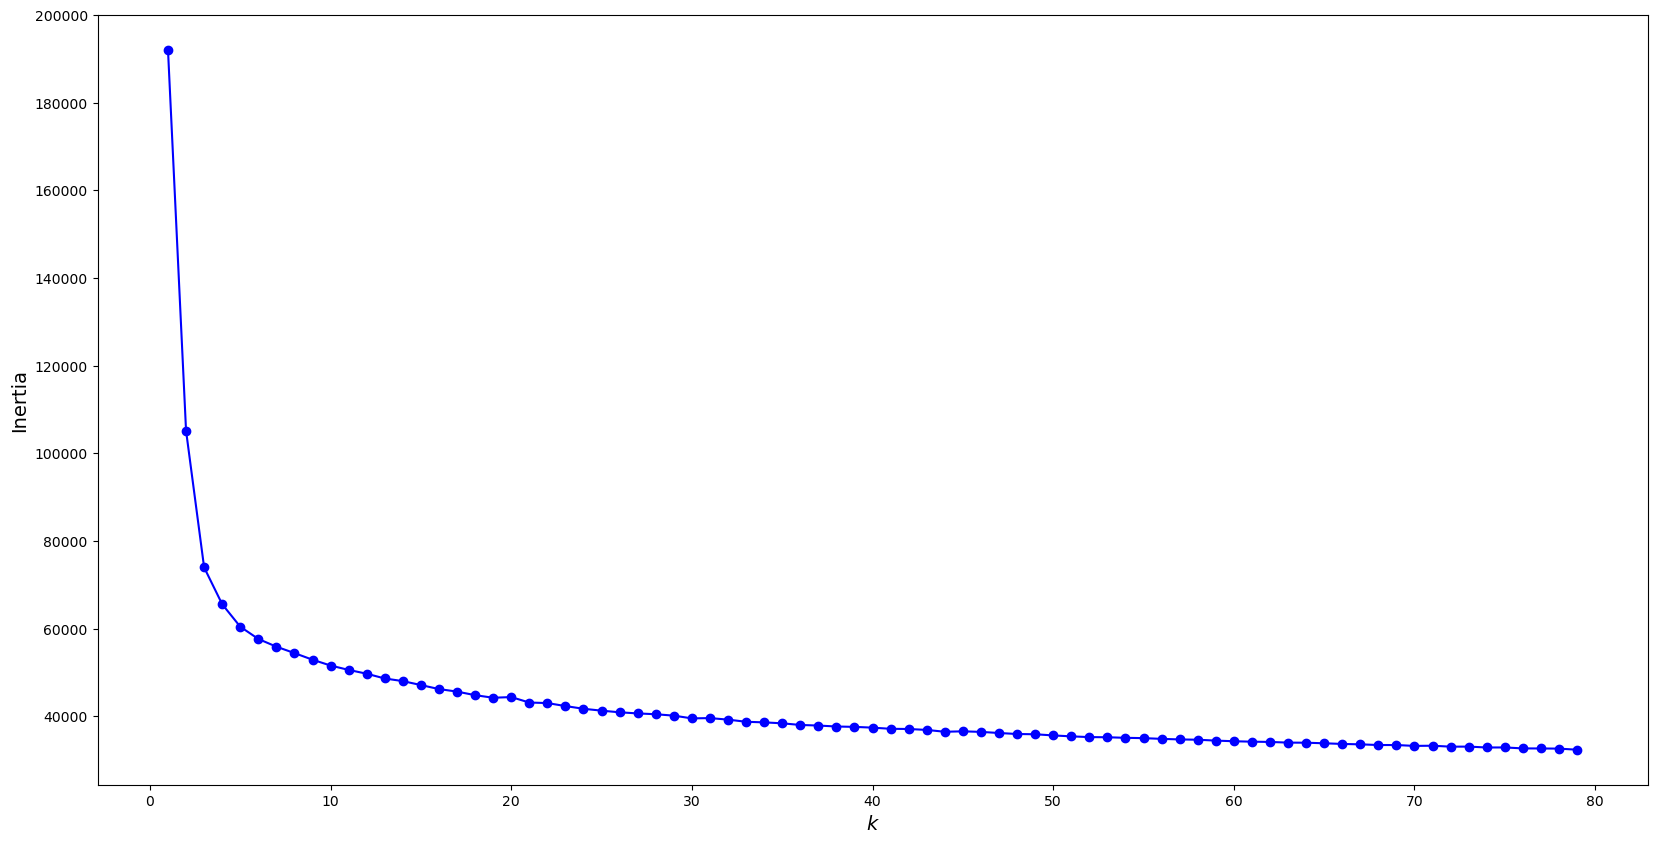

In [33]:
plt.figure(figsize=(20,10))
plt.plot(range(1, 80),m, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

value of k will be between 0 to 10

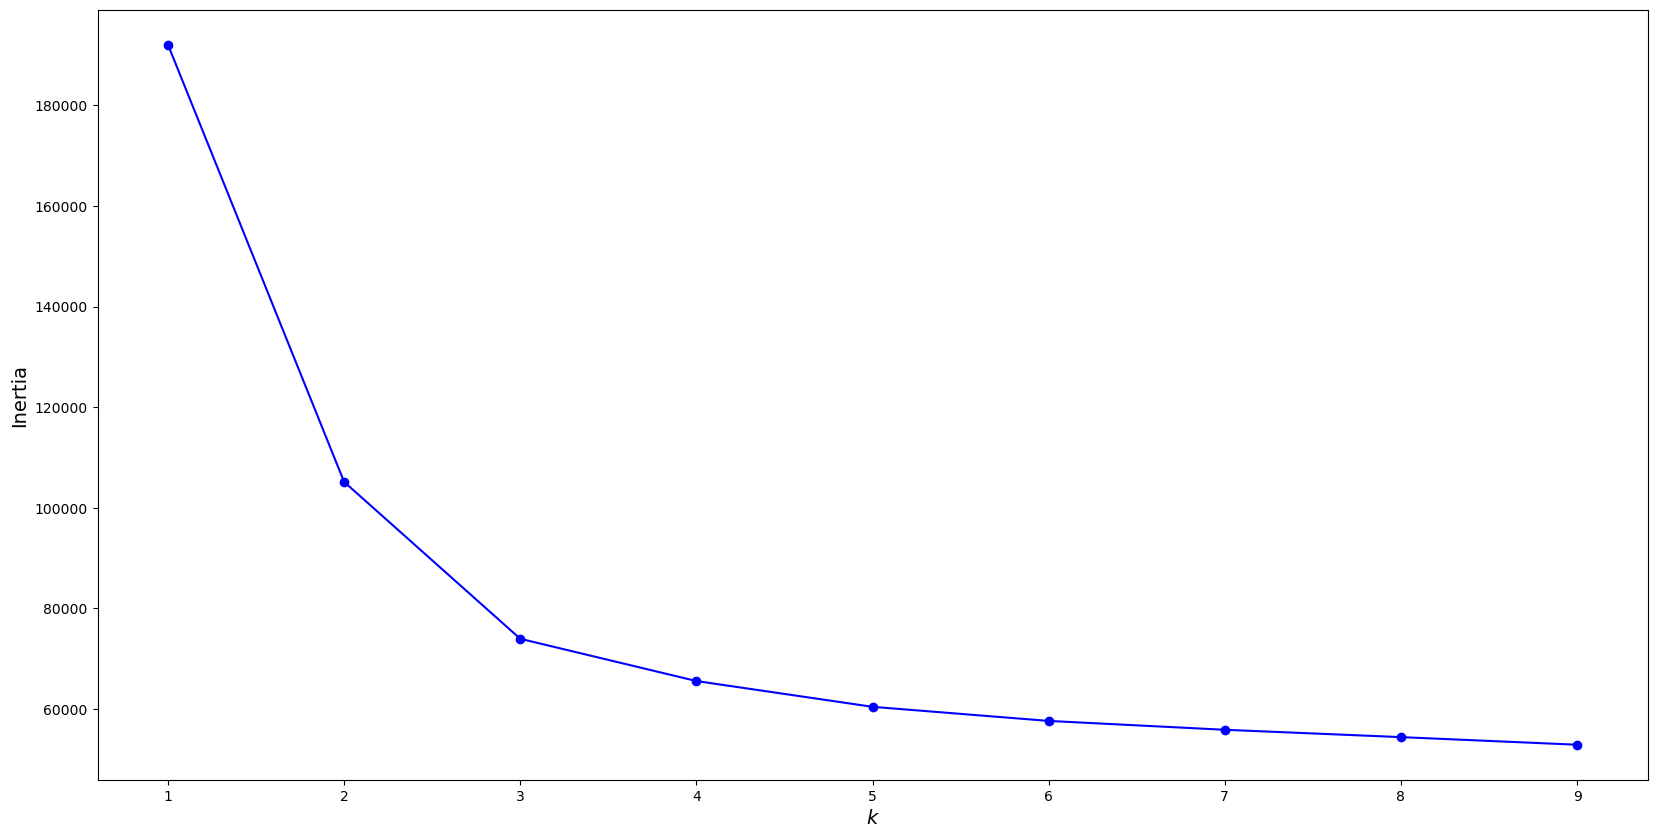

In [34]:
l=[]
p=[]
for k in range(1,10):
    km=KMeans(n_clusters=k, random_state=42).fit(features)
    l.append(km.inertia_)
    p.append(km)
plt.figure(figsize=(20,10))
plt.plot(range(1, 10),l, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

value of k  may be 3 lets cross check using silhoutte score (l stores model inertia,p stores all model

In [35]:
from sklearn.metrics import silhouette_score
silhouette_scores =[]
for model in p[1:]:
    s=silhouette_score(features, model.labels_)
    silhouette_scores.append(s)
    

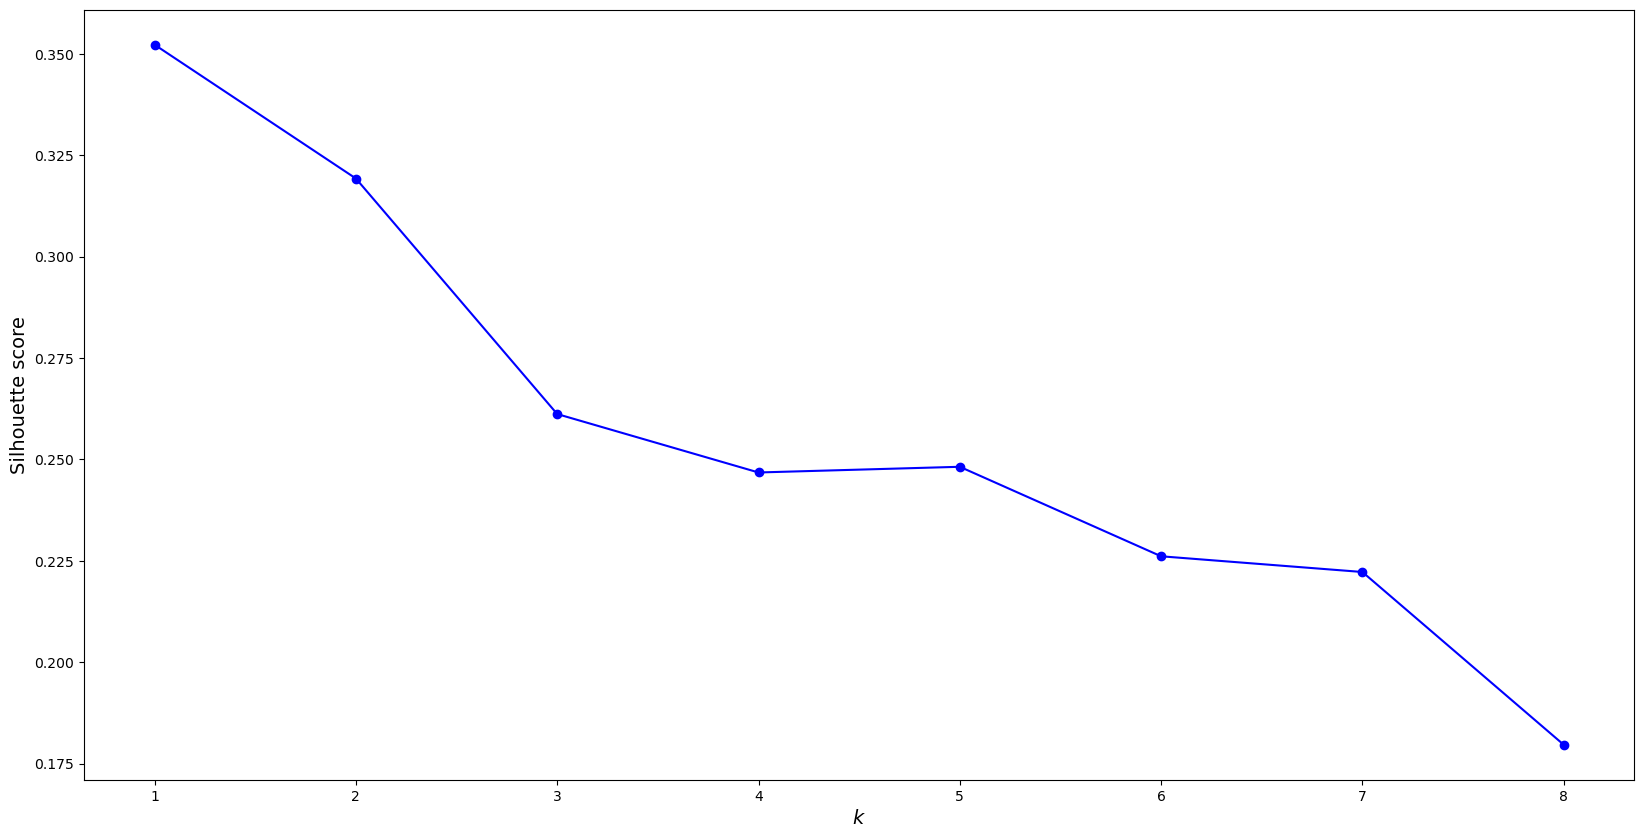

In [36]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 9),silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()



Silhoutte curve is not as we want(their might be some error)

# May be we should try reducing dimensions before clustering 

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)


In [38]:
f=pca.fit_transform(features)

In [39]:
f

array([[ 0.74231262, -0.10972046],
       [ 0.72750008, -0.14714621],
       [-7.58649782,  0.36422966],
       ...,
       [-7.43229258, -0.79495891],
       [ 9.11140595, -0.56513993],
       [ 9.11140595, -0.56513993]])

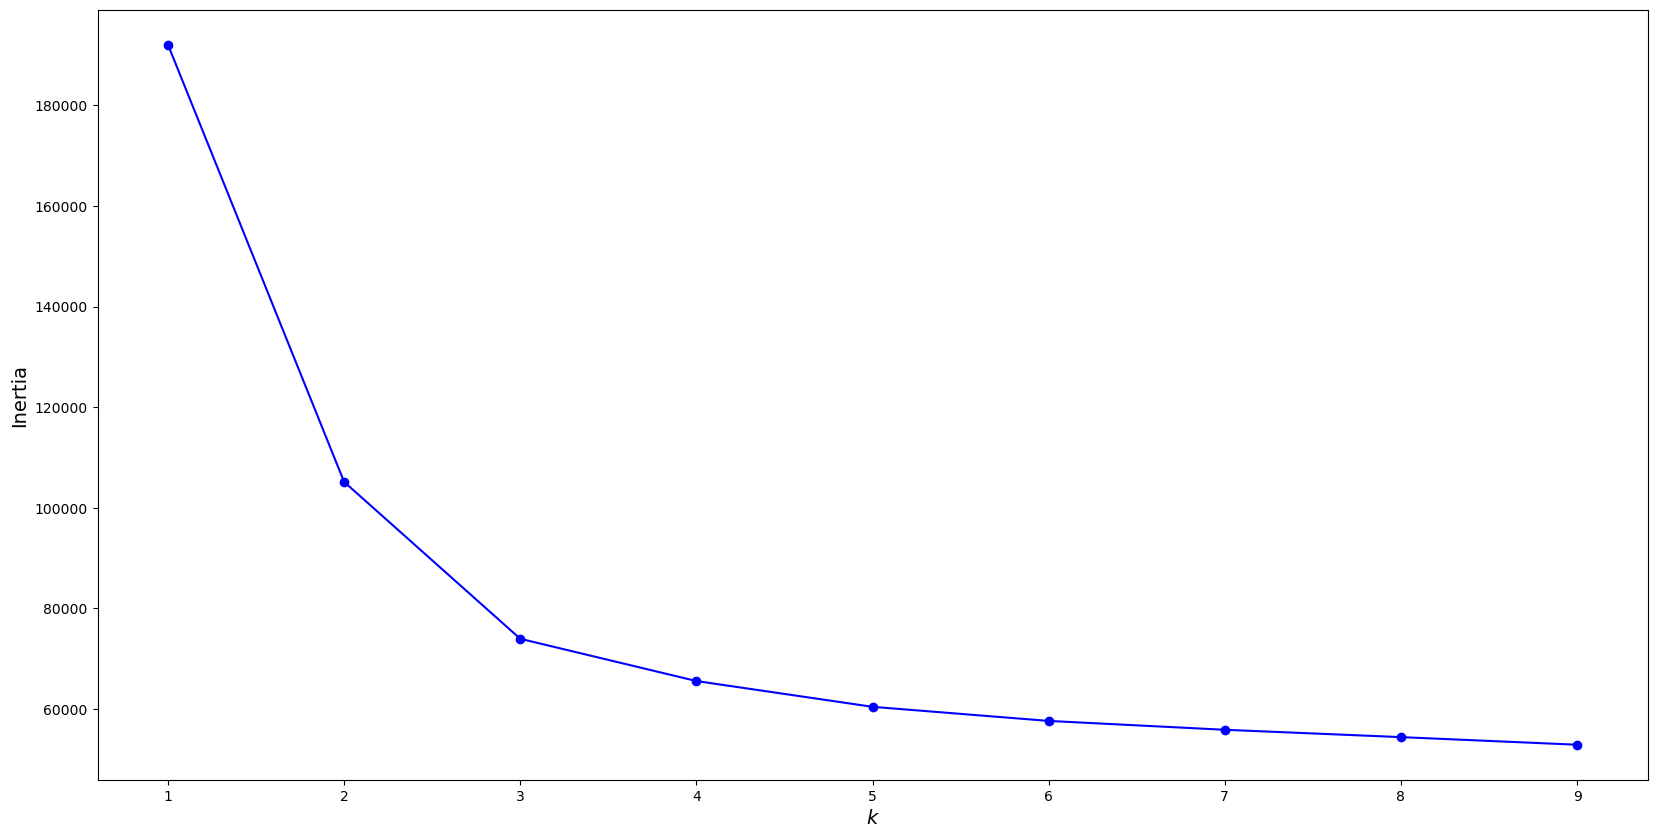

In [40]:
l=[]
p=[]
for k in range(1,10):
    km=KMeans(n_clusters=k, random_state=42).fit(features)
    l.append(km.inertia_)
    p.append(km)
plt.figure(figsize=(20,10))
plt.plot(range(1, 10),l, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Elbow method again giving value of k to be 3 or 4

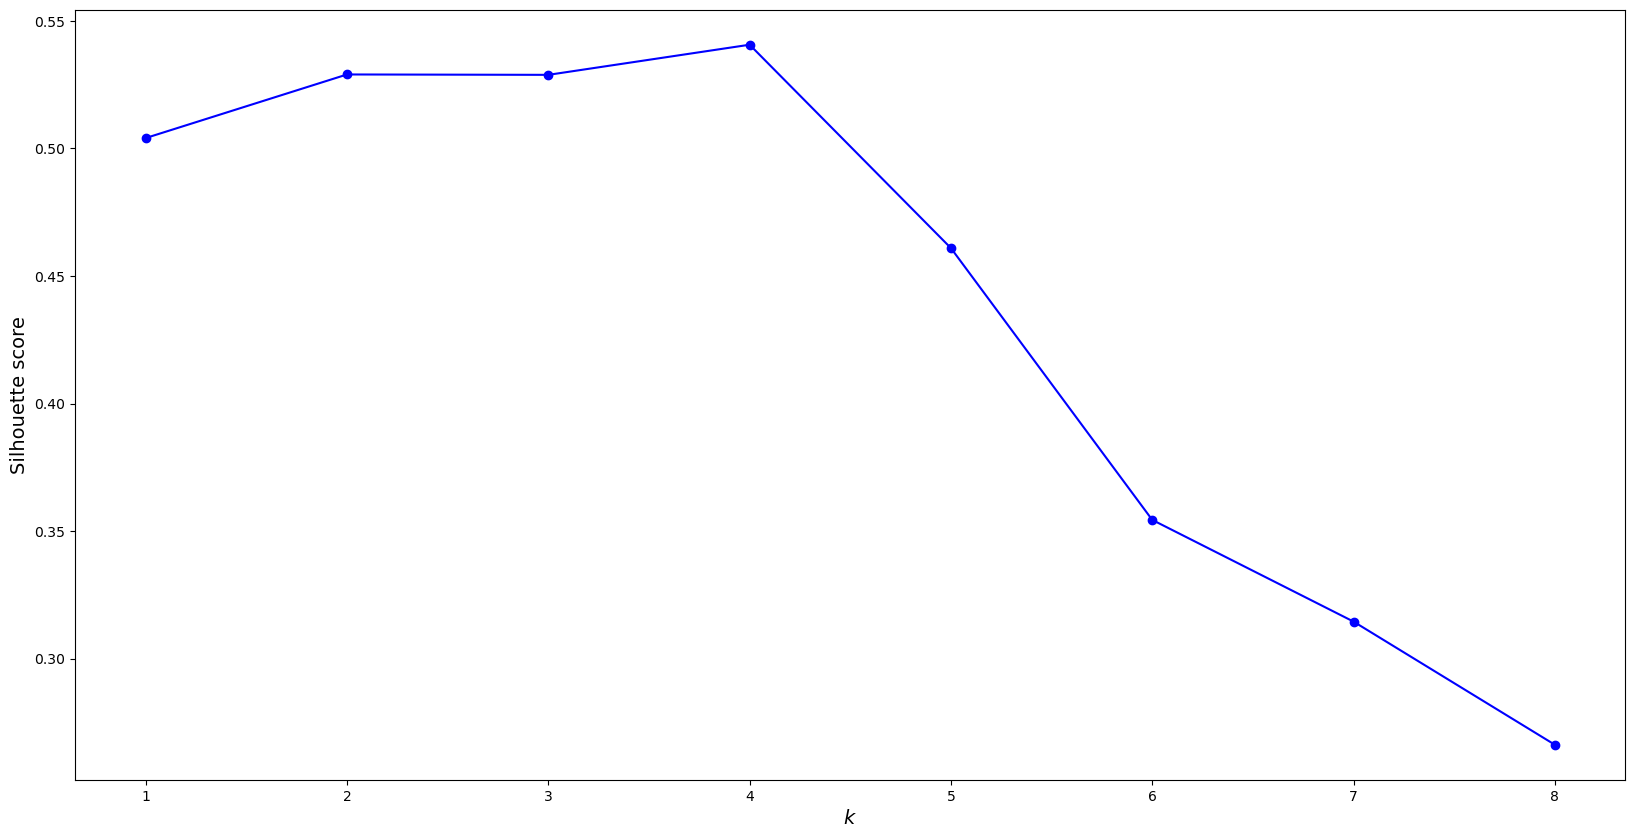

In [41]:
silhouette_scores =[]
for model in p[1:]:
    s=silhouette_score(f, model.labels_)
    silhouette_scores.append(s)
plt.figure(figsize=(20, 10))
plt.plot(range(1, 9),silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()  

k=4 is the best value for number of cluster(Elbow method is giving k=3,4 silhoutte scores is giving k=4 so intersection will be k=4)

Clustering after PCA in this case produce better silhoutte scores graph

In [42]:
#kmeans = KMeans(n_clusters=3, random_state=42)
#y_pred = kmeans.fit_predict(f)


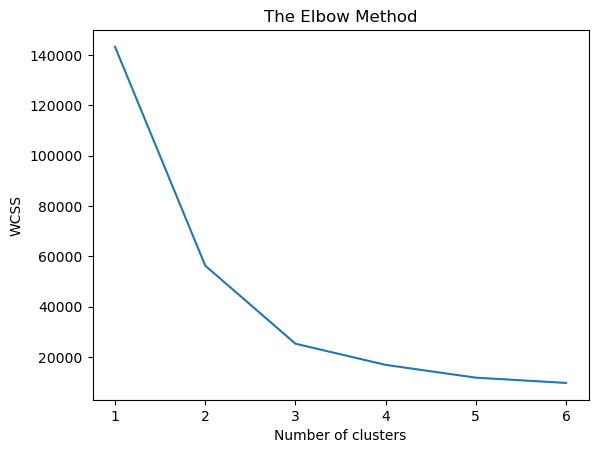

In [43]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(f)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(f)

In [45]:
t=kmeans.labels_

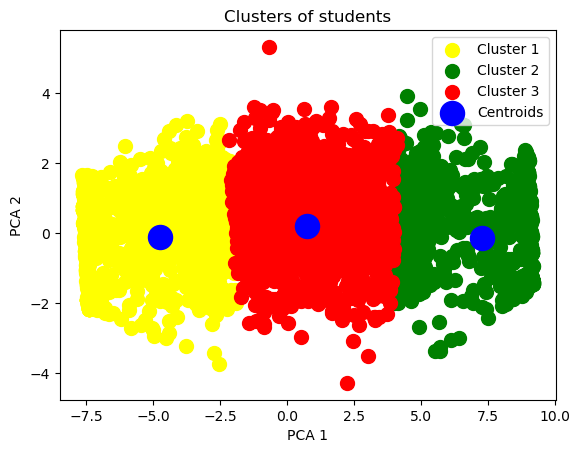

In [46]:
# Visualising the clusters
plt.scatter(f[y_kmeans == 0, 0], f[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(f[y_kmeans == 1, 0], f[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(f[y_kmeans == 2, 0], f[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [47]:
# Let me check the count of students in each cluster
import collections
collections.Counter(y_pred)

Counter({1: 1903, 3: 849, 0: 728, 2: 1626, 4: 714})

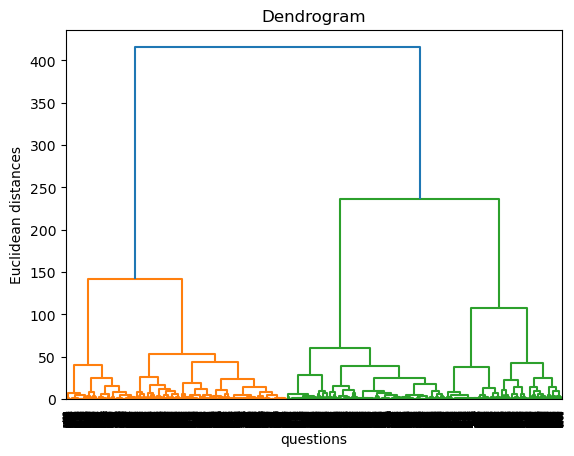

In [48]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(f, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

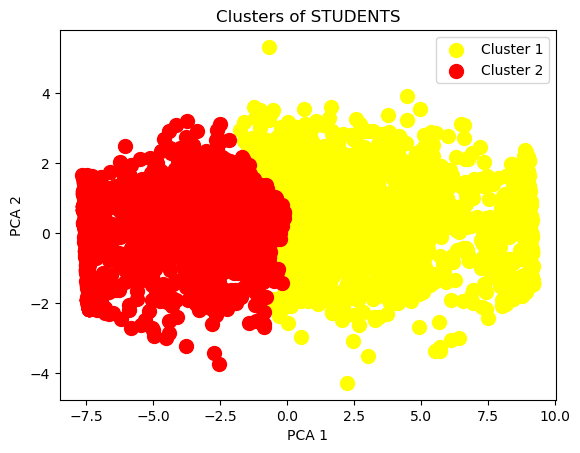

In [49]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(f)
X = f
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.title('Clusters of STUDENTS')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [50]:
# Let me check the count of students in each cluster
import collections
collections.Counter(y_hc)

Counter({0: 3218, 1: 2602})

If we compare the clusters of Kmeans and Hierarchical process, we can see cluster with red ( Negative is matching approximately)

# CLASSIFICATION ALGORITHM (MULTICLASS CLASSIFICATION PROBLEM- RANDOM FOREST CLASSIFICATION)

In [51]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

x_train,x_test,y_train,y_test = train_test_split(f,t, train_size=0.80, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=8, random_state=42)
cv_scores = cross_val_score(rnd_clf, x_train, y_train, cv=10)
cv_scores.mean()

0.9965642161613365

In [53]:
rnd_clf.fit(x_train,y_train)
rnd_clf.score(x_test,y_test)

0.9974226804123711

we are getting 99% accuracy

Lets try various n_estimators and max_leaf_nodes value

In [54]:
n_estimator=[10,100,400,500,600,700,800,2000]
max_leaf_nodes=[2,4,6,8,16]
for i in n_estimator:
    for k in max_leaf_nodes:
       rnd_clf = RandomForestClassifier(n_estimators=i, max_leaf_nodes=k, random_state=42)
       rnd_clf.fit(x_train, y_train)
       t=rnd_clf.score(x_test,y_test)
       print(i,k,t)
    print("-"*40)

10 2 0.7938144329896907
10 4 0.9965635738831615
10 6 0.9965635738831615
10 8 0.9965635738831615
10 16 1.0
----------------------------------------
100 2 0.7800687285223368
100 4 0.9965635738831615
100 6 0.9965635738831615
100 8 0.9965635738831615
100 16 0.9991408934707904
----------------------------------------
400 2 0.7938144329896907
400 4 0.9974226804123711
400 6 0.9974226804123711
400 8 0.9974226804123711
400 16 0.9991408934707904
----------------------------------------
500 2 0.781786941580756
500 4 0.9974226804123711
500 6 0.9974226804123711
500 8 0.9974226804123711
500 16 0.9991408934707904
----------------------------------------
600 2 0.7809278350515464
600 4 0.9974226804123711
600 6 0.9974226804123711
600 8 0.9974226804123711
600 16 0.9991408934707904
----------------------------------------
700 2 0.7809278350515464
700 4 0.9974226804123711
700 6 0.9974226804123711
700 8 0.9974226804123711
700 16 0.9991408934707904
----------------------------------------
800 2 0.78092783505

Our Random Forest Classifier is giving as 99% accuracy (min hyperparameter value for best score n_estimator=500,max_leaf_nodes=6)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, f1_score

np.random.seed(1234)


# Assuming 'features' and 'labels' are your dataset's features and labels


# Instantiate and train the Random Forest Classifier
rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=8, random_state=42)
rnd_clf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = rnd_clf.predict(x_test)

# Calculating TP, FP, Precision, and F1-score
conf_matrix = confusion_matrix(y_test, y_pred)

# Assuming a binary classification with positive class being '1'
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]


precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# Printing the metrics
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


True Positives (TP): 237
False Positives (FP): 0
Precision: 0.997716894977169
F1 Score: 0.997472498132912
